In [1]:
%matplotlib widget
import numpy as np
import json, copy
import os, math, glob
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr
from IPython.display import clear_output, display
from ipyfilechooser import FileChooser

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Fluence scans
* [Reduce one run](#Reduce_one)
* [Plot averaged curves](#Ave_data)
* [Overlay different scans](#Overlay)

<a id='Reduce_one'></a>
## Reduce one run

In [2]:
pgroup='p21960'
runnumber = 20
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
run_name = jsonfile.split('/')[-3]
jsonfile

run: 0020


'/sf/alvra/data/p21960/raw/run0020-GSCbl_fluence_2467p5eV/meta/scan.json'

In [3]:
quantile_corr = 0.5

detector_XAS = channel_diode_2
detector_Izero = channel_Izero122

reducedir='/sf/alvra/data/{}/work/Reduced_data/Fluencescans/'.format(pgroup)
saveflag = True
#######################################################################################################
from sfdata import SFScanInfo
#try:
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

(DataDiode_pump, DataDiode_unpump, Pump_probe_Diode, Izero_pump, Izero_unpump, correlation, waveplate, goodshots) = \
XAS_scanPP_1diode_noTT(scan, detector_XAS, detector_Izero, quantile_corr)

if saveflag:
    os.makedirs(reducedir+run_name, exist_ok=True)
    save_reduced_data_1diode(reducedir, run_name, scan, 
                             DataDiode_pump, DataDiode_unpump, Pump_probe_Diode, goodshots, correlation)
    # save_data_XANES(reducedir, run_name, waveplate, 
    #             DataDiode_pump, DataDiode_unpump, Pump_probe_Diode, goodshots)
data, _ = load_reduced_data(pgroup, reducedir, [runnumber])
globals().update(data)
#except:
#    print ('==> json file not yet ready!! <==')

Processing: run0020-GSCbl_fluence_2467p5eV
Step 15 of 15: Processing acq0015

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet      1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY    1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 3 / 3 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 495 pump and 495 unpump shots
118 shots out of 495 survived
Step 15 of 15: Processed acq0015
correlation Diode (all shots) = 0.9988283648525913
------------------------------
Processed 15 out of 15 files


PermissionError: [Errno 13] Permission denied: '/sf/alvra/data/p21960/work/Reduced_data/Fluencescans/run0020-GSCbl_fluence_2467p5eV/run_array.npy'

In [ ]:
#[2.40744133e+02 1.67279498e-01 4.07745686e+01]
#waveplate2 = 0.12612736 + 66.03399024*(np.cos(np.pi/180.*(waveplate - 60.29428308)))**2

#[2.40744133e+02 1.67279498e-01 4.07745686e+01]
#waveplate2 = 0.167279498 + 40.7745686*(np.cos(np.pi/180.*(waveplate - 240.744133)))**2    ##calibration from 3.12 in the night
#waveplate2 = 0 + 44.82*(np.cos(np.pi/180.*(waveplate - 277.63)))**2    ##calibration from 3.12 in the night

#yscale = 8.16083889
#xshift = 91.2282651 

#params = [-1.17278977e-05,  6.57499993e-03, -1.24567847e+00,  8.02365598e+01]
#params = [ 3.14281178e-05, -2.86261544e-02,  9.84475847e+00, -1.51870990e+03, 8.89465859e+04] # from calibration of 30.1.2023
#params = [-7.21911422e-06,  6.04482517e-03, -1.69891672e+00,  1.60422596e+02] # from calibration of 1.3.2023
#params = [-8.86247086e-06,  7.44315684e-03, -2.09808323e+00,  1.98679907e+02] # from calibration of 5.3.2023
#params = [2.90209790e-08, -4.51165501e-05,  2.48473776e-02, -5.87923310e+00, 5.10842126e+02] # from calibration of 02.5.2023
#params = [5.06555944e-05, -3.86201437e-02,  1.11748616e+01, -1.46157922e+03, 7.33303974e+04]
#params = [3.25284091e-04, -1.79957702e-01,  3.77406534e+01, -3.59251462e+03, 1.33083606e+05]
#params = [-6.26456878e-02, 5.40802255e+01, -1.74193710e+04, 2.47921762e+06, -1.31421048e+08]
#params = [-1.00000000e-05,  2.77777778e-04,  3.47500000e-02, -8.68253968e-01, 5.54547619e+00]
#params = [-9.950799516706151e-06, 0.0008438820764648243, -0.018441544079262306, -0.11824241174014784, 5.476151131090644]
params= [1.4663461538461553e-07, -1.2599747474747458e-05, 0.0008293546037296041, -0.046164646464646415, 1.2462645687645673]

p = np.poly1d(params)

#intensity = waveplate 
intensity = p(waveplate)                                                              ## pulse energy (in uJ)
#intensity = p2 + p3*(2*np.cos(np.pi/180.*(waveplate + p1)))**2                       ## pulse energy (in uJ)
#intensity = yscale*(2*np.cos(np.pi/180.*(waveplate - xshift)))**2
#intensity = (p2 + p3*(np.cos(2*np.pi/180.*(waveplate - p1)))**2 )*1e-3/(2.45*1e-5)   ## fluence (in mJ/cm2)

# Plot Fluence scan

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring, fontsize = 12)

XAS_pump = DataDiode_pump[:,0]
err_low_pump = DataDiode_pump[:,1]
err_high_pump = DataDiode_pump[:,2]
XAS_unpump = DataDiode_unpump[:,0]
err_low_unpump = DataDiode_unpump[:,1]
err_high_unpump = DataDiode_unpump[:,2]
XAS_pump_probe = Pump_probe_Diode[:,0]
err_low_pump_probe = Pump_probe_Diode[:,1]
err_high_pump_probe = Pump_probe_Diode[:,2]

ax1.plot(intensity, XAS_pump, label='ON, diode1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(intensity, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(intensity, XAS_unpump, label='OFF, diode1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(intensity, err_low_unpump, err_high_unpump, color='navajowhite')

ax1.set_xlabel("Pulse energy (uJ)")
#ax1.set_xlabel("Fluence (mJ/cm2)")
ax1.set_ylabel ("XAS diode 1(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax2.plot(intensity, XAS_pump_probe, label='pp, diode1, {}%'.format(quantile_corr*100),marker='.', color = 'g')
ax2.fill_between(intensity, err_low_pump_probe, err_high_pump_probe, color='lightgreen')
#ax2.axes.errorbar(intensity, XAS_pump_probe, (XAS_pump_probe-err_low_pump_probe), (err_high_pump_probe-XAS_pump_probe), 
            # lw=1,color='green', markersize=0,capsize=3,capthick=1,
            #      ecolor='green',elinewidth=1)

#ax2.set_xscale('log')
        
ax2.set_xlabel("Pulse energy (uJ)")
#ax2.set_xlabel("Fluence (mJ/cm2)")
ax2.set_ylabel ("Delta XAS")
ax2.set_title('pump probe')
ax2.legend(loc="best")
ax2.grid()

plt.show()

<a id='Ave_data'></a>
## Average scans 1 diode

In [19]:
pgroup = 'p21210'
Loaddir_name = 'Reduced_fluencescan_test'

#runlist = np.arange(22, 23)
runlist = [300]
##############################################
Loaddir = '/sf/alvra/data/{}/work/Claudio/{}/'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
try:
    print ('{} scan(s) of {} steps each'.format(len(runlist), int(len(DataDiode1_pump)/len(runlist))))
except:
    print ('Not all the runs have the same number of steps')

[300]
1 scan(s) of 11 steps each


In [12]:
#params = [-6.26456878e-02, 5.40802255e+01, -1.74193710e+04, 2.47921762e+06, -1.31421048e+08]
p = np.poly1d(params)
intensity = p(readbacks)       

In [13]:
#### CH1 ####
DataDiode1_pump   = np.asarray(DataDiode1_pump)
DataDiode1_unpump = np.asarray(DataDiode1_unpump)
Pump_probe_Diode1 = np.asarray(Pump_probe_Diode1)
goodshots1        = np.asarray(goodshots1)

DataDiode1_pump   = np.reshape(np.asarray(DataDiode1_pump), (len(runlist), -1, 3))
DataDiode1_unpump = np.reshape(np.asarray(DataDiode1_unpump), (len(runlist), -1, 3))
Pump_probe_Diode1 = np.reshape(np.asarray(Pump_probe_Diode1), (len(runlist), -1, 3))
goodshots1        = np.reshape(np.asarray(goodshots1), (len(runlist), -1))

XAS1_pump        = np.mean(DataDiode1_pump[:,:,0], axis=0)
err1_low_pump    = np.mean((DataDiode1_pump[:,:,0]-DataDiode1_pump[:,:,1])/np.sqrt(goodshots1), axis=0)
err1_high_pump   = np.mean((DataDiode1_pump[:,:,2]-DataDiode1_pump[:,:,0])/np.sqrt(goodshots1), axis=0)

XAS1_unpump      = np.mean(DataDiode1_unpump[:,:,0], axis=0)
err1_low_unpump  = np.mean((DataDiode1_unpump[:,:,0]-DataDiode1_unpump[:,:,1])/np.sqrt(goodshots1), axis=0)
err1_high_unpump = np.mean((DataDiode1_unpump[:,:,2]-DataDiode1_unpump[:,:,0])/np.sqrt(goodshots1), axis=0)

XAS1_pump_probe       = np.mean(Pump_probe_Diode1[:,:,0], axis=0)
err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)

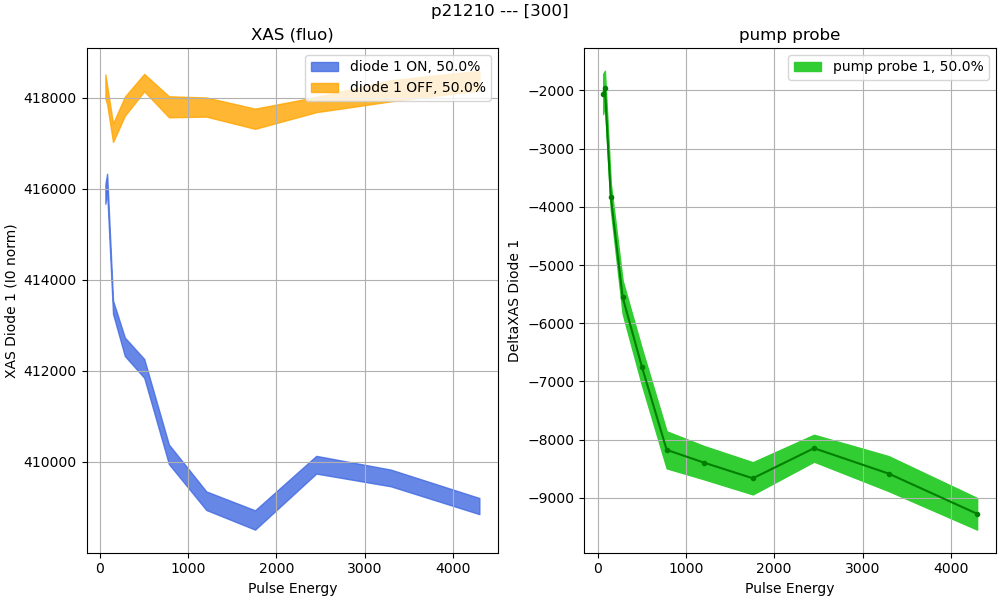

In [14]:
quantile_corr = 0.5

fig, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)
plt.suptitle(titlestring_stack)

#ff = glob.glob(Loaddir+'/*{:04d}*/XANES_energy_eV.npy'.format(runlist[0]))
#waveplate = np.load(ff[0])
intensity = p(waveplate) 

ax1.fill_between(intensity, XAS1_pump - err1_low_pump, XAS1_pump + err1_high_pump , label='diode 1 ON, {}%'.format(quantile_corr*100), color='royalblue', alpha = 0.8)
ax1.fill_between(intensity, XAS1_unpump - err1_low_unpump, XAS1_unpump + err1_high_unpump, label='diode 1 OFF, {}%'.format(quantile_corr*100),color='orange', alpha = 0.8)
ax2.fill_between(intensity, XAS1_pump_probe - err1_low_pump_probe, XAS1_pump_probe + err1_low_pump_probe, label='pump probe 1, {}%'.format(quantile_corr*100),color='limegreen')
ax2.plot(intensity, XAS1_pump_probe, color='green', marker='.')

ax1.set_xlabel("Pulse Energy")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax2.set_xlabel("Pulse Energy")
ax2.set_ylabel ("DeltaXAS Diode 1")
ax2.set_title('pump probe')
ax2.legend(loc="best")
ax2.grid()

plt.show()

<a id='Overlay'></a>
## Overlay different scans

In [63]:
#runlist = np.arange(283, 293, 1)
runlist = [61, 223]
Loaddir = '../Reduced_fluencescan/'

##############################################
import glob
titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 2 runs: [61, 223] from ../Reduced_fluencescan/


['../Reduced_fluencescan/run0061-Fluence_scan_1ps_2145p8eV/run_array.npy',
 '../Reduced_fluencescan/run0223-fluence_scan_8982p1_1ps/run_array.npy']

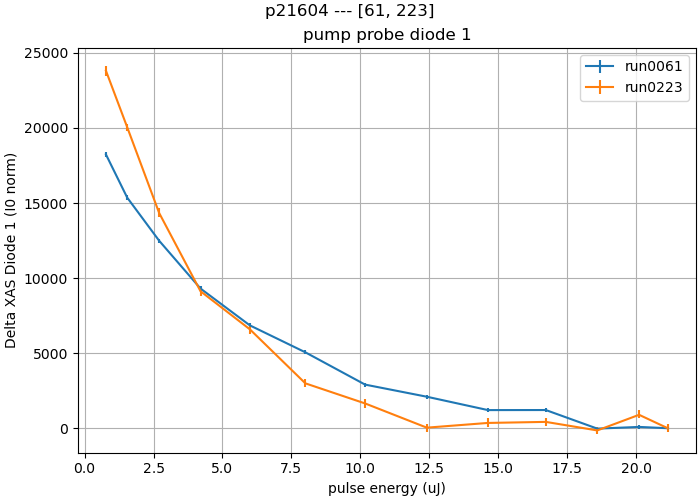

In [65]:
fig, (ax1) = plt.subplots(1, figsize=(7, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)

keys = []

for run in runlist:
    path = glob.glob(Loaddir + '/*{:04d}*/'.format(run))
    run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        runnumber = run_array[key]["name"].split('-')[0]
        waveplate = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
    
        #params = [-6.26456878e-02, 5.40802255e+01, -1.74193710e+04, 2.47921762e+06, -1.31421048e+08]
        p = np.poly1d(params)
        intensity = p(waveplate)
        
        ax1.axes.errorbar(intensity, XAS1_pump_probe[:,0]-XAS1_pump_probe[-1,0], (err1_low_pump_probe, err1_high_pump_probe), label=runnumber)
        
        #plt.plot(run_array[key]["Energy_eV"],run_array[key]["Pump_probe_Diode1"][:,0], label=runnumber, marker='.')
ax1.set_xlabel("pulse energy (uJ)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
ax1.legend()
ax1.grid()

ax1.set_title('pump probe diode 1')

plt.show()

# Calculate laser fluence 

In [ ]:
fluences = 0.20514 +346.78 * (np.cos(np.pi/180*(Waveplate_deg-768.56)))**2

In [ ]:
print(Waveplate_deg)
print(fluences)
plt.figure()
plt.title(fc.selected.split('/')[-1])
plt.plot(fluences, XAS_pump_probe/XAS_unpump, marker = '.')
plt.grid()
plt.xlabel('Fluence (uJ)')
plt.ylabel('pump probe (%)')
plt.show()